In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
import random
from sklearn.linear_model import HuberRegressor 

In [3]:
# set working directory to the directory with input files
! cd "/home/aswin/aksharad/share_figure/figure_2/"

In [7]:
## load tf ntf count info
df_all=pd.read_csv("./organism_info_tf_ntf_count", sep="\t")


In [8]:
## load colour and plot properties
pal_hls = sns.color_palette("Set1").as_hex()
print(pal_hls)
pl=['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#2a9d8f', '#a65628', '#f781bf', '#999999',"#9b9b7a","#fbc3bc","#90a8c3","#cb997e"]

PROPS = {
    'boxprops':{'edgecolor':'black', "linewidth":1},
    'medianprops':{'color':'black', "linewidth":1},
    'whiskerprops':{'color':'black', "linewidth":1},
    'capprops':{'color':'black', "linewidth":1},
    'flierprops':{"markerfacecolor":'black', "markeredgecolor":"black", "linewidth":.5,"markersize":1}
}
#sns.set_style('white')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

palette1 = [ "#c08497","#a2d2ff","#ccd5ae","#fec89a"]

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


/tmp/ipykernel_11550/3905693925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["best"]=(10**c)*(dfa.Total_protein**m)
/tmp/ipykernel_11550/3905693925.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["best"]=(10**c)*(dfp.Total_protein**m)
/tmp/ipykernel_11550/3905693925.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

<Axes: xlabel='Total_protein', ylabel='SF_prot_count'>

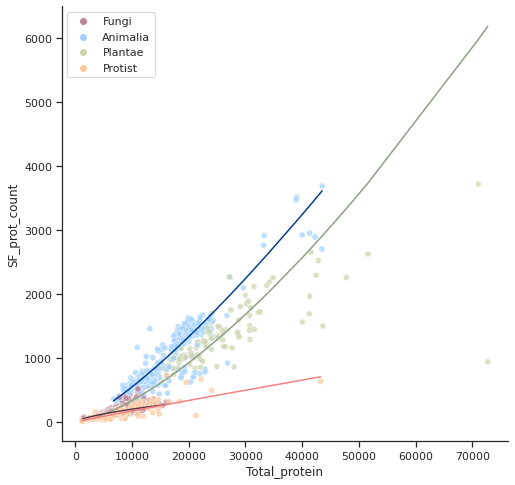

In [9]:
# Figure S1. F
dfa=df_all[df_all.kingdom=="Animalia"]
x=np.log10(np.array(dfa.Total_protein.to_list()).reshape([-1,1]))
y=np.log10(np.array(dfa.SF_prot_count.to_list()))
model=HuberRegressor().fit(x,y)
m=model.coef_[0]
c=model.intercept_
dfa["best"]=(10**c)*(dfa.Total_protein**m)

dfp=df_all[df_all.kingdom=="Plantae"]
x=np.log10(np.array(dfp.Total_protein.to_list()).reshape([-1,1]))
y=np.log10(np.array(dfp.SF_prot_count.to_list()))
model=HuberRegressor() .fit(x,y)
m=model.coef_[0]
c=model.intercept_
dfp["best"]=(10**c)*(dfp.Total_protein**m)

dff=df_all[df_all.kingdom=="Fungi"]
x=np.log10(np.array(dff.Total_protein.to_list()).reshape([-1,1]))
y=np.log10(np.array(dff.SF_prot_count.to_list()))
model=HuberRegressor() .fit(x,y)
m=model.coef_[0]
c=model.intercept_
dff["best"]=(10**c)*(dff.Total_protein**m)


dfr=df_all[(df_all.kingdom=="Protist")&(df_all.Total_TF!=0)]
x=np.log10(np.array(dfr.Total_protein.to_list()).reshape([-1,1]))
y=np.log10(np.array(dfr.SF_prot_count.to_list()))
model=HuberRegressor().fit(x,y)
m=model.coef_[0]
c=model.intercept_
dfr["best"]=(10**c)*(dfr.Total_protein**m)

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df_all,x="Total_protein", y="SF_prot_count", hue="kingdom", palette=palette1, alpha=0.7)
sns.lineplot(data=dfa,x="Total_protein", y="best", color='#023e8a')
sns.lineplot(data=dfp,x="Total_protein", y="best", color='#8d9f87')
sns.lineplot(data=dff,x="Total_protein", y="best", color='#5c374c')
sns.lineplot(data=dfr,x="Total_protein", y="best", color='#f68080')


/tmp/ipykernel_11550/2253655320.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)
/tmp/ipykernel_11550/2253655320.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["best"]=(10**c)*(dfa.Total_protein**m)


Animalia [1.6175196] -3.9215500527902325 0.00011979810469490768
Animalia [0.83816116] -0.7476092780545123 0.00011979810469490768


/tmp/ipykernel_11550/2253655320.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)
/tmp/ipykernel_11550/2253655320.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["best"]=(10**c)*(dfa.Total_protein**m)


Animalia [0.89532389] -1.4874454528331245 0.0325502663900371
Animalia [1.03147178] -2.033389510418975 0.0325502663900371


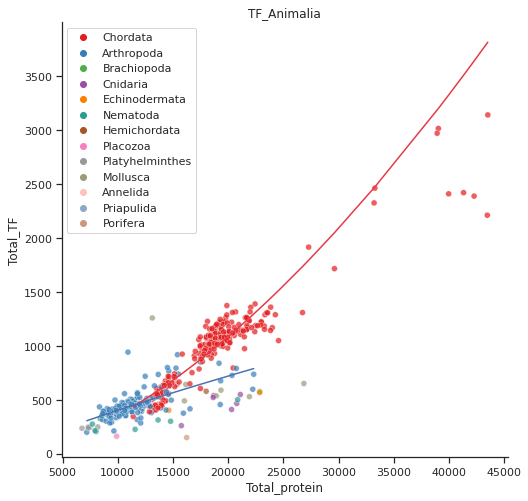

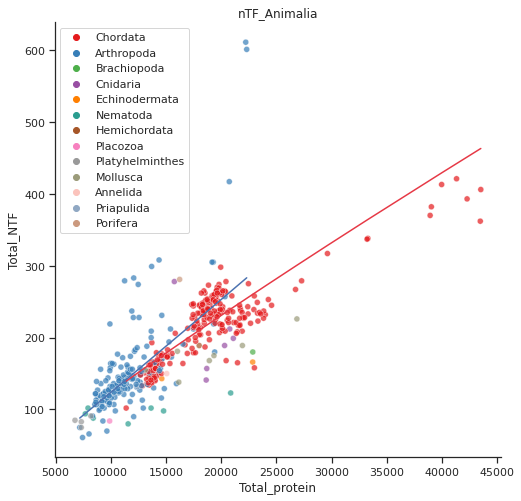

In [10]:
# Figure.2 D, H 
## tf v/s proteom size regression for animalia 
for i in ["Animalia"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="Chordata"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_TF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    
    dfa=dfx[dfx.phylum=="Arthropoda"]
    x=np.log10(np.array(dfa.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfa.Total_TF.to_list()))                         ## change
    model=HuberRegressor().fit(x,y)
    print(i,model.coef_, model.intercept_, 10**c)
    m=model.coef_
    c=model.intercept_
    dfa["best"]=(10**c)*(dfa.Total_protein**m)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_TF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfc,x="Total_protein", y="best", color='#e63946')
    sns.lineplot(data=dfa,x="Total_protein", y="best")
    plt.title("TF_%s"%i)

## ntf v/s proteom size regression for animalia 
for i in ["Animalia"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="Chordata"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_NTF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    
    dfa=dfx[dfx.phylum=="Arthropoda"]
    x=np.log10(np.array(dfa.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfa.Total_NTF.to_list()))                         ## change
    model=HuberRegressor().fit(x,y)
    print(i,model.coef_, model.intercept_, 10**c)
    m=model.coef_
    c=model.intercept_
    dfa["best"]=(10**c)*(dfa.Total_protein**m)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_NTF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfc,x="Total_protein", y="best", color='#e63946')
    sns.lineplot(data=dfa,x="Total_protein", y="best")
    plt.title("nTF_%s"%i)

/tmp/ipykernel_11550/3497439841.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)
/tmp/ipykernel_11550/3497439841.py:15: UserWarning: The palette list has more values (13) than needed (3), which may not be intended.
  sns.scatterplot(x="Total_protein", y="Total_TF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
/tmp/ipykernel_11550/3497439841.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)

Plantae [1.01581277] -1.5131520848858109 0.030679474406773384
Plantae [0.92162133] -1.6655563603517374 0.02159949710179568


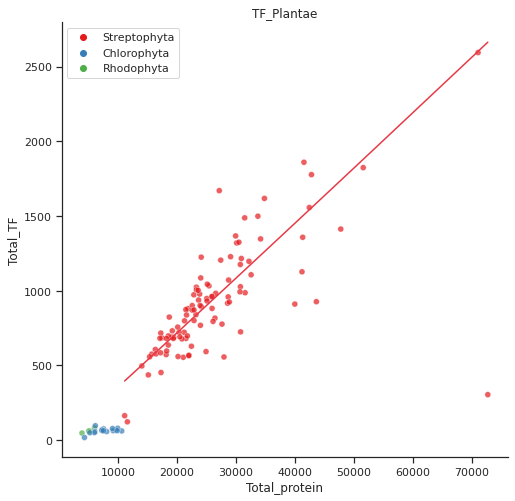

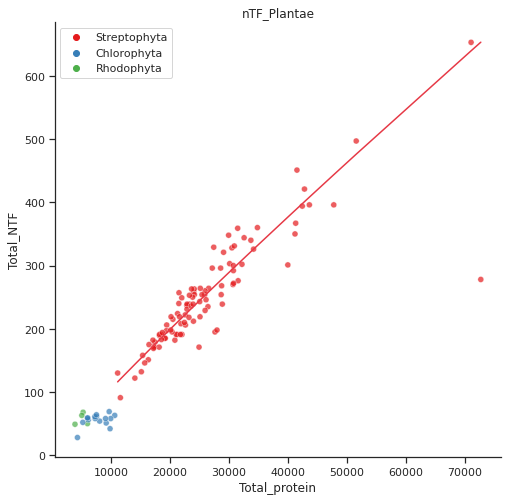

In [11]:
# Figure.2 C, G 
## tf v/s proteom size regression for Plant
for i in ["Plantae"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="Streptophyta"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_TF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_TF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfc,x="Total_protein", y="best", color='#e63946')
    plt.title("TF_%s"%i)

## ntf v/s proteom size regression for animalia 
for i in ["Plantae"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="Streptophyta"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_NTF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_NTF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfc,x="Total_protein", y="best", color='#e63946')
    plt.title("nTF_%s"%i)

/tmp/ipykernel_11550/1147688400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)
/tmp/ipykernel_11550/1147688400.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["best"]=(10**c)*(dfa.Total_protein**m)
/tmp/ipykernel_11550/1147688400.py:23: UserWarning: The palette list has more values (13) than needed (9), which may not be intended.
  sns.scatterplot(x="Total_protein", y="Total_TF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change

Fungi [0.64913587] -0.6374289672913599 0.23044698616878465
Fungi [0.78657837] -1.1593541240032872 0.23044698616878465


/tmp/ipykernel_11550/1147688400.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)
/tmp/ipykernel_11550/1147688400.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["best"]=(10**c)*(dfa.Total_protein**m)
/tmp/ipykernel_11550/1147688400.py:50: UserWarning: The palette list has more values (13) than needed (9), which may not be intended.
  sns.scatterplot(x="Total_protein", y="Total_NTF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## chang

Fungi [0.31277439] 0.6161154874495802 4.131573540549113
Fungi [0.43876135] 0.10857018520722723 4.131573540549113


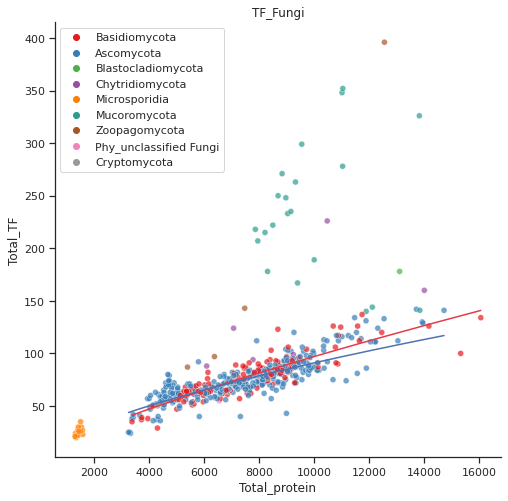

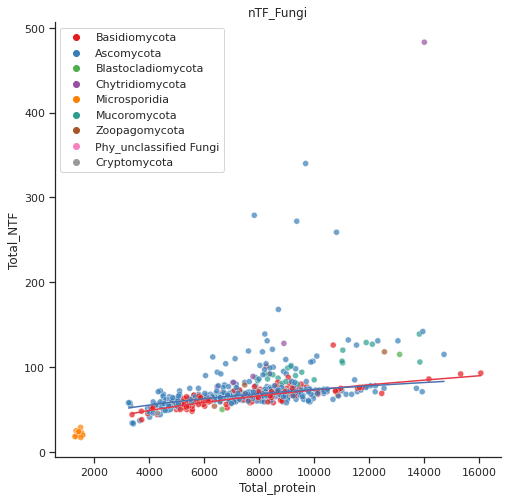

In [12]:
# Figure.2 B, F 
## tf v/s proteom size regression for Fungi 
for i in ["Fungi"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="Ascomycota"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_TF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    
    dfa=dfx[dfx.phylum=="Basidiomycota"]
    x=np.log10(np.array(dfa.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfa.Total_TF.to_list()))                         ## change
    model=HuberRegressor().fit(x,y)
    print(i,model.coef_, model.intercept_, 10**c)
    m=model.coef_
    c=model.intercept_
    dfa["best"]=(10**c)*(dfa.Total_protein**m)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_TF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfa,x="Total_protein", y="best", color='#e63946')
    sns.lineplot(data=dfc,x="Total_protein", y="best")
    plt.title("TF_%s"%i)

## ntf v/s proteom size regression for animalia 
for i in ["Fungi"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="Ascomycota"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_NTF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    
    dfa=dfx[dfx.phylum=="Basidiomycota"]
    x=np.log10(np.array(dfa.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfa.Total_NTF.to_list()))                         ## change
    model=HuberRegressor().fit(x,y)
    print(i,model.coef_, model.intercept_, 10**c)
    m=model.coef_
    c=model.intercept_
    dfa["best"]=(10**c)*(dfa.Total_protein**m)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_NTF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfa,x="Total_protein", y="best", color='#e63946')
    sns.lineplot(data=dfc,x="Total_protein", y="best")
    plt.title("nTF_%s"%i)

/tmp/ipykernel_11550/3716886669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)
/tmp/ipykernel_11550/3716886669.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["best"]=(10**c)*(dfa.Total_protein**m)
/tmp/ipykernel_11550/3716886669.py:23: UserWarning: The palette list has more values (13) than needed (3), which may not be intended.
  sns.scatterplot(x="Total_protein", y="Total_TF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change

Protist [1.1191287] -2.4689886604585847 0.0033963414041001698
Protist [0.27992115] -0.2116775374987821 0.0033963414041001698


/tmp/ipykernel_11550/3716886669.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["best"]=(10**c)*(dfc.Total_protein**m)
/tmp/ipykernel_11550/3716886669.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["best"]=(10**c)*(dfa.Total_protein**m)
/tmp/ipykernel_11550/3716886669.py:50: UserWarning: The palette list has more values (13) than needed (3), which may not be intended.
  sns.scatterplot(x="Total_protein", y="Total_NTF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## chang

Protist [0.82012788] -1.4119121875063185 0.03873359546839716
Protist [0.80860296] -1.4589610741550625 0.03873359546839716


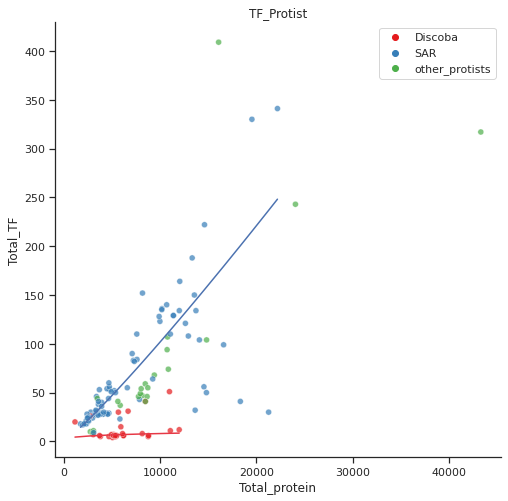

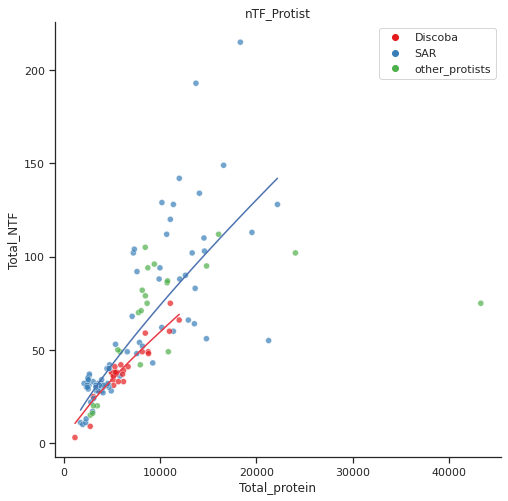

In [13]:
# Figure.2 A, E 
## tf v/s proteom size regression for Protist
for i in ["Protist"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="SAR"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_TF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    
    dfa=dfx[dfx.phylum=="Discoba"]
    x=np.log10(np.array(dfa.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfa.Total_TF.to_list()))                         ## change
    model=HuberRegressor().fit(x,y)
    print(i,model.coef_, model.intercept_, 10**c)
    m=model.coef_
    c=model.intercept_
    dfa["best"]=(10**c)*(dfa.Total_protein**m)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_TF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfa,x="Total_protein", y="best", color='#e63946')
    sns.lineplot(data=dfc,x="Total_protein", y="best")
    plt.title("TF_%s"%i)

## ntf v/s proteom size regression for animalia 
for i in ["Protist"]:
    dfx=df_all[(df_all.kingdom==i)&(df_all.Total_TF!=0)]    
    dfc=dfx[dfx.phylum=="SAR"]
    x=np.log10(np.array(dfc.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfc.Total_NTF.to_list()))                        ## change
    model=HuberRegressor().fit(x,y)
    m=model.coef_[0]
    c=model.intercept_
    dfc["best"]=(10**c)*(dfc.Total_protein**m)
    print(i,model.coef_, model.intercept_, 10**c)
    
    dfa=dfx[dfx.phylum=="Discoba"]
    x=np.log10(np.array(dfa.Total_protein.to_list()).reshape([-1,1]))
    y=np.log10(np.array(dfa.Total_NTF.to_list()))                         ## change
    model=HuberRegressor().fit(x,y)
    print(i,model.coef_, model.intercept_, 10**c)
    m=model.coef_
    c=model.intercept_
    dfa["best"]=(10**c)*(dfa.Total_protein**m)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="Total_protein", y="Total_NTF", data=dfx, hue="phylum", palette=pl, alpha=0.7)                ## change
    sns.lineplot(data=dfa,x="Total_protein", y="best", color='#e63946')
    sns.lineplot(data=dfc,x="Total_protein", y="best")
    plt.title("nTF_%s"%i)